### 변동성 돌파 전략
- ETF 종목 많이 사용
- 변동폭 = 전일 고가 - 전일 저가 - > 목표가 = 당일 시가 + (변동폭 * K)

In [25]:
from pykrx import stock

In [26]:
df_kosdaq_150 = stock.get_market_ohlcv_by_date("20100101", "20231231", "229200")
df_kosdaq_150

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300
2015-10-05,10255,10265,10210,10231,43154,0.817895
2015-10-06,10248,10274,10172,10176,42399,-0.537582
2015-10-07,10094,10094,9947,9949,21324,-2.230739
...,...,...,...,...,...,...
2023-12-21,13770,14014,13630,13790,10951076,-0.648415
2023-12-22,13864,13894,13590,13650,9008577,-1.015228
2023-12-26,13649,13709,13415,13515,6178469,-0.989011


In [27]:
df_kosdaq_150['변동폭'] = df_kosdaq_150['고가'] - df_kosdaq_150['저가']
df_kosdaq_150.columns

Index(['시가', '고가', '저가', '종가', '거래량', '등락률', '변동폭'], dtype='object')

In [28]:
df_kosdaq_150['전일 변동폭'] = df_kosdaq_150['변동폭'].shift(periods=1)

In [29]:
df_kosdaq_150['목표가'] = df_kosdaq_150['시가'] + (df_kosdaq_150['전일 변동폭'] * 0.5)
df_kosdaq_150.head(10)


,시가,고가,저가,종가,거래량,등락률,변동폭,전일 변동폭,목표가
날짜,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0
2015-10-08,10004,10022,9786,9857,42198,-0.924716,236,147.0,10077.5
2015-10-12,9853,9853,9824,9832,42207,-0.253627,29,236.0,9971.0
2015-10-13,9869,9869,9778,9781,21088,-0.518714,91,29.0,9883.5
2015-10-14,9773,9804,9731,9734,23318,-0.480523,73,91.0,9818.5


In [30]:
df_kosdaq_150['종가'] / df_kosdaq_150['목표가']

날짜
2015-10-01         NaN
2015-10-02    0.997984
2015-10-05    0.996494
2015-10-06    0.990317
2015-10-07    0.980680
                ...   
2023-12-21    0.996243
2023-12-22    0.971116
2023-12-26    0.979277
2023-12-27    1.001308
2023-12-28    1.003099
Length: 2029, dtype: float64

In [31]:
sellConditions = df_kosdaq_150['고가'] >= df_kosdaq_150['목표가'] # 매도 조건



In [32]:
import numpy as np
df_kosdaq_150['수익률'] = np.where(sellConditions, df_kosdaq_150['종가'] / df_kosdaq_150['목표가'] , 1)
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일 변동폭,목표가,수익률
날짜,,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN,1.0
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5,1.0
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0,1.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5,1.0
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0,1.0


In [33]:
df_kosdaq_150['누적수익률'] = df_kosdaq_150['수익률'].cumprod()
df_kosdaq_150.tail()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일 변동폭,목표가,수익률,누적수익률
날짜,,,,,,,,,,,
2023-12-21,13770,14014,13630,13790,10951076,-0.648415,384,144.0,13842.0,0.996243,2.954442
2023-12-22,13864,13894,13590,13650,9008577,-1.015228,304,384.0,14056.0,1.000000,2.954442
2023-12-26,13649,13709,13415,13515,6178469,-0.989011,294,304.0,13801.0,1.000000,2.954442
2023-12-27,13610,13814,13580,13775,10911781,1.923788,234,294.0,13757.0,1.001308,2.958308
2023-12-28,13760,13920,13695,13920,6992583,1.052632,225,234.0,13877.0,1.003099,2.967475


#### 누적 수익률 이용한 CAGR

In [34]:
delta_days = df_kosdaq_150.index[-1] - df_kosdaq_150.index[0]
delta_days.days

3010

In [35]:
year = delta_days.days / 365

전략 적용 vs 단순 보유

In [36]:
import matplotlib.pyplot as plt


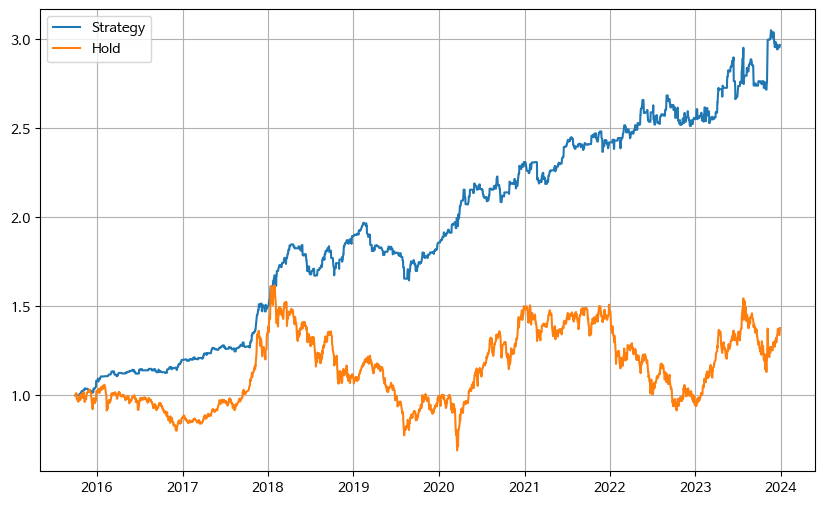

In [41]:
plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(df_kosdaq_150['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(df_kosdaq_150['종가'] / df_kosdaq_150['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()